In [25]:
import numpy as np
import pickle as pkl
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPool2D


from sklearn.neighbors import NearestNeighbors
import os
from numpy.linalg import norm

In [26]:
import zipfile
with zipfile.ZipFile("Images.zip", 'r') as zip_ref:
    zip_ref.extractall("extracted")

In [27]:
filenames = []
image_folder = 'extracted/Images'

for file in os.listdir(image_folder):
    full_path = os.path.join(image_folder, file)
    filenames.append(full_path)


In [28]:
len(filenames)


3524

In [29]:
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
model.trainable = False

model = tf.keras.models.Sequential([model,
                                   GlobalMaxPool2D()
                                   ])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d_1          │ (None, 2048)           │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [30]:
img = image.load_img('1164.jpg', target_size=(224,224))
img_array = image.img_to_array(img)
img_expand_dim = np.expand_dims(img_array, axis=0)
img_preprocess = preprocess_input(img_expand_dim)
result = model.predict(img_preprocess).flatten()
norm_result = result/norm(result)
norm_result

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


array([5.5704954e-06, 1.0178067e-01, 2.0306820e-02, ..., 2.6300030e-03,
       2.3691975e-02, 4.2438094e-02], dtype=float32)

In [31]:
def extract_features_from_images(image_path, model):
    img = image.load_img(image_path, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_expand_dim = np.expand_dims(img_array, axis=0)
    img_preprocess = preprocess_input(img_expand_dim)
    result = model.predict(img_preprocess).flatten()
    norm_result = result/norm(result)
    return norm_result

In [32]:
extract_features_from_images(filenames[0], model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


array([0.00744709, 0.02767955, 0.00285151, ..., 0.00837349, 0.00975048,
       0.0042365 ], dtype=float32)

In [12]:
image_features = []
for file in filenames:
    image_features.append(extract_features_from_images(file, model))
image_features

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

[array([0.00744709, 0.02767955, 0.00285151, ..., 0.00837349, 0.00975048,
        0.0042365 ], dtype=float32),
 array([0.00205363, 0.00342866, 0.00982362, ..., 0.        , 0.00353476,
        0.05133257], dtype=float32),
 array([0.00731772, 0.02945365, 0.00659508, ..., 0.00329393, 0.01535174,
        0.01430428], dtype=float32),
 array([0.00856278, 0.03435314, 0.00318221, ..., 0.00376754, 0.009109  ,
        0.04350667], dtype=float32),
 array([0.01009076, 0.01755607, 0.00021717, ..., 0.        , 0.01331021,
        0.01834877], dtype=float32),
 array([0.032137  , 0.01036802, 0.01643486, ..., 0.01416996, 0.03001666,
        0.00468013], dtype=float32),
 array([0.0051094 , 0.02492028, 0.0003551 , ..., 0.        , 0.02774139,
        0.02968846], dtype=float32),
 array([0.00624407, 0.06023955, 0.00467837, ..., 0.00278557, 0.02613041,
        0.02662407], dtype=float32),
 array([0.00216657, 0.0257585 , 0.01179304, ..., 0.00263612, 0.00918782,
        0.05385741], dtype=float32),
 array([0.

In [33]:
Image_features = pkl.dump(image_features, open('Images_features.pkl','wb'))

In [34]:
filenames = pkl.dump(filenames, open('filenames.pkl','wb'))

In [35]:
Image_features = pkl.load(open('Images_features.pkl','rb'))

In [36]:
filenames = pkl.load(open('filenames.pkl','rb'))

In [37]:
np.array(Image_features).shape

(3524, 2048)

In [38]:
neighbors = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean')

In [39]:
input_image = extract_features_from_images('1164.jpg',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


In [45]:
neighbors.fit(Image_features)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=6)

In [46]:
distance,indices = neighbors.kneighbors([input_image])

In [48]:
indices[0]

array([1437, 3043, 1719, 3486, 2488,  807])

In [49]:
from IPython.display import Image

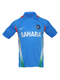

In [50]:
Image('1164.jpg')

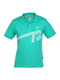

In [51]:
Image(filenames[indices[0][1]])

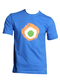

In [52]:
Image(filenames[indices[0][2]])

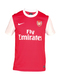

In [53]:
Image(filenames[indices[0][3]])

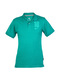

In [54]:
Image(filenames[indices[0][4]])

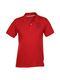

In [55]:
Image(filenames[indices[0][5]])